In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams['figure.figsize'] = (10,7)

In [3]:
df_train = pd.read_csv('train.csv',encoding='ISO-8859-1',names= ['vehicleID','datacollected','vehiclename','sellertype','offertype',
                                                                 'price','vehicletype','registrationyr','gearbox','engpower',
                                                                 'model','dist_travelled','registrationmonth','fueltype','brand',
                                                                 'damage_repair','adcreation_date','no_pictures','zipcode','last_ad_date'])

C:\Users\hp\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (0,5,7,9,11,12,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df_train.drop(df_train.index[0],inplace=True)

In [5]:
df_train.head()

vehicleID   datacollected  \
1         1  03/04/16 11:54   
2         2  08/03/16 19:54   
3         3  26/03/16 17:38   
4         4  11/03/16 13:42   
5         5  17/03/16 17:49   

                                         vehiclename sellertype offertype  \
1                               Subaru_G3X_Justy_1.3    private     offer   
2  Volkswagen_Passat_Variant_2.0_TDI_DPF_Comfortline    private     offer   
3  Mercedes_Benz_C_220_CDI_Automatik_Elegance_AHK...    private     offer   
4                   Alfa_Romeo_147_1.9_JTD_16V_M_Jet    private     offer   
5                                            Audi_A4    private     offer   

   price vehicletype registrationyr    gearbox engpower     model  \
1   3850   Small Car           2004     manual       94     Other   
2   5999       Combi           2007     manual      140    passat   
3   5990   limousine           2007  automatic      150  c_klasse   
4   4000   limousine           2005     manual      150       147   
5  12950       Combi           2005     manual      200        a4   

  dist_travelled registrationmonth fueltype          brand damage_repair  \
1          50000                 7   petrol         subaru            No   
2         150000                 5   diesel     volkswagen            No   
3         150000                 2   diesel  mercedes_benz            No   
4         150000                 9   diesel     alfa_romeo            No   
5         125000                 3   petrol           audi            No   

  adcreation_date no_pictures zipcode    last_ad_date  
1   03/04/16 0:00           0   34474  07/04/16 13:15  
2   08/03/16 0:00           0   50765  11/03/16 17:15  
3   26/03/16 0:00           0   90475  26/03/16 17:38  
4   11/03/16 0:00           0   40699   12/03/16 2:45  
5   17/03/16 0:00           0   84347   07/04/16 4:17

In [6]:
df_test = pd.read_csv('test.csv',encoding='ISO-8859-1',names= ['vehicleID','datacollected','vehiclename','sellertype','offertype',
                                                               'vehicletype','registrationyr','gearbox','engpower',
                                                                 'model','dist_travelled','registrationmonth','fueltype','brand',
                                                                 'damage_repair','adcreation_date','no_pictures','zipcode','last_ad_date'])

In [7]:
df_test.drop(df_test.index[0],inplace=True)

In [8]:
df_test.head()

vehicleID   datacollected  \
1     60001  14/03/16 12:52   
2     60002  21/03/16 21:37   
3     60003  21/03/16 12:57   
4     60004  23/03/16 15:48   
5     60005  18/03/16 21:44   

                                         vehiclename sellertype offertype  \
1                     Jeep_Grand_Cherokee_"Overland"    private     offer   
2                     VW_PASSAT_1.9_TDI_131_PS_LEDER    private     offer   
3  Nissan_Navara_2.5DPF_SE4x4_Klima_Sitzheizg_Blu...    private     offer   
4                   Ford_C_MAX_2.0_TDCi_DPF_Titanium    private     offer   
5              BMW_530d_touring_Vollausstattung_NAVI    private     offer   

  vehicletype registrationyr    gearbox engpower   model dist_travelled  \
1         suv           2004  automatic      163   grand         125000   
2       Combi           2004     manual      131  passat         150000   
3         suv           2011     manual      190  navara          70000   
4         bus           2007     manual      136   c_max         150000   
5       Combi           2002  automatic      193     5er         150000   

  registrationmonth fueltype       brand damage_repair adcreation_date  \
1                 8   diesel        jeep           NaN   14/03/16 0:00   
2                 2      NaN  volkswagen            No   21/03/16 0:00   
3                 3   diesel      nissan            No   21/03/16 0:00   
4                 6   diesel        ford            No   23/03/16 0:00   
5                 9   diesel         bmw           Yes   18/03/16 0:00   

  no_pictures zipcode    last_ad_date  
1           0   90480  05/04/16 12:47  
2           0   90762   23/03/16 2:50  
3           0    4177   06/04/16 7:45  
4           0   88361  05/04/16 18:45  
5           0   73765  18/03/16 21:44

In [9]:
sub = pd.read_csv('sampleSubmission.csv',encoding='ISO-8859-1',names=['vehicleID','price'])

In [10]:
sub.drop(sub.index[0],inplace=True)

In [11]:
sub.head()

vehicleID  price
1     60001   9800
2     60002   2500
3     60003  17999
4     60004   7550
5     60005   2500

### FInding Insights from Train data

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58857 entries, 1 to 58857
Data columns (total 20 columns):
vehicleID            58857 non-null object
datacollected        58857 non-null object
vehiclename          58857 non-null object
sellertype           58857 non-null object
offertype            58857 non-null object
price                58857 non-null object
vehicletype          57013 non-null object
registrationyr       58857 non-null object
gearbox              57138 non-null object
engpower             58857 non-null object
model                58857 non-null object
dist_travelled       58857 non-null object
registrationmonth    58857 non-null object
fueltype             56772 non-null object
brand                58857 non-null object
damage_repair        52008 non-null object
adcreation_date      58857 non-null object
no_pictures          58857 non-null object
zipcode              58857 non-null object
last_ad_date         58857 non-null object
dtypes: object(20)
memory usage

In [13]:
## converting dtypes for both test and train data

In [14]:
df_train['price'] = df_train['price'].astype(np.int64)
df_train['registrationyr'] = df_train['registrationyr'].astype(np.int64)
df_train['engpower'] = df_train['engpower'].astype(np.int64)
df_train['dist_travelled'] = df_train['dist_travelled'].astype(np.float64)
df_train['registrationmonth'] = df_train['registrationmonth'].astype(np.int64)
df_train['no_pictures'] = df_train['no_pictures'].astype(np.int64)
df_train['zipcode'] = df_train['zipcode'].astype(np.int64)

In [15]:
df_test['registrationyr'] = df_test['registrationyr'].astype(np.int64)
df_test['engpower'] = df_test['engpower'].astype(np.int64)
df_test['dist_travelled'] = df_test['dist_travelled'].astype(np.float64)
df_test['registrationmonth'] = df_test['registrationmonth'].astype(np.int64)
df_test['no_pictures'] = df_test['no_pictures'].astype(np.int64)
df_test['zipcode'] = df_test['zipcode'].astype(np.int64)

In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58857 entries, 1 to 58857
Data columns (total 20 columns):
vehicleID            58857 non-null object
datacollected        58857 non-null object
vehiclename          58857 non-null object
sellertype           58857 non-null object
offertype            58857 non-null object
price                58857 non-null int64
vehicletype          57013 non-null object
registrationyr       58857 non-null int64
gearbox              57138 non-null object
engpower             58857 non-null int64
model                58857 non-null object
dist_travelled       58857 non-null float64
registrationmonth    58857 non-null int64
fueltype             56772 non-null object
brand                58857 non-null object
damage_repair        52008 non-null object
adcreation_date      58857 non-null object
no_pictures          58857 non-null int64
zipcode              58857 non-null int64
last_ad_date         58857 non-null object
dtypes: float64(1), int64(6), object

In [17]:
df_train.describe()

price  registrationyr      engpower  dist_travelled  \
count  58857.000000    58857.000000  58857.000000    58857.000000   
mean    7638.980971     2006.286457    129.956454   120146.626569   
std     6710.787043        4.016998    178.359488    41188.999160   
min     1001.000000     2000.000000      0.000000     5000.000000   
25%     2850.000000     2003.000000     86.000000    90000.000000   
50%     5400.000000     2006.000000    121.000000   150000.000000   
75%     9999.000000     2009.000000    163.000000   150000.000000   
max    39800.000000     2016.000000  19211.000000   150000.000000   

       registrationmonth  no_pictures       zipcode  
count       58857.000000      58857.0  58857.000000  
mean            6.178093          0.0  51941.873881  
std             3.523184          0.0  25639.658736  
min             0.000000          0.0   1067.000000  
25%             3.000000          0.0  31675.000000  
50%             6.000000          0.0  51067.000000  
75%             9.000000          0.0  72760.000000  
max            12.000000          0.0  99998.000000

In [18]:
df_train.no_pictures.unique() #we can remove this column since it has no meaning

array([0], dtype=int64)

In [19]:
df_test.no_pictures.unique()

array([0], dtype=int64)

In [20]:
import pandas_profiling

C:\Users\hp\Anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  matplotlib.use(BACKEND)


In [21]:
pandas_profiling.ProfileReport(df_train)

In [22]:
df_train.offertype.nunique()

1

In [23]:
df_train.sellertype.unique()

array(['private'], dtype=object)

In [24]:
#we are dropping three columns from train and test as they have constant values

In [25]:
df_train.drop(columns=['no_pictures','offertype','sellertype'],axis=1,inplace=True)
df_test.drop(columns=['no_pictures','offertype','sellertype'],axis=1,inplace=True)

In [26]:
df_train.head()

vehicleID   datacollected  \
1         1  03/04/16 11:54   
2         2  08/03/16 19:54   
3         3  26/03/16 17:38   
4         4  11/03/16 13:42   
5         5  17/03/16 17:49   

                                         vehiclename  price vehicletype  \
1                               Subaru_G3X_Justy_1.3   3850   Small Car   
2  Volkswagen_Passat_Variant_2.0_TDI_DPF_Comfortline   5999       Combi   
3  Mercedes_Benz_C_220_CDI_Automatik_Elegance_AHK...   5990   limousine   
4                   Alfa_Romeo_147_1.9_JTD_16V_M_Jet   4000   limousine   
5                                            Audi_A4  12950       Combi   

   registrationyr    gearbox  engpower     model  dist_travelled  \
1            2004     manual        94     Other         50000.0   
2            2007     manual       140    passat        150000.0   
3            2007  automatic       150  c_klasse        150000.0   
4            2005     manual       150       147        150000.0   
5            2005     manual       200        a4        125000.0   

   registrationmonth fueltype          brand damage_repair adcreation_date  \
1                  7   petrol         subaru            No   03/04/16 0:00   
2                  5   diesel     volkswagen            No   08/03/16 0:00   
3                  2   diesel  mercedes_benz            No   26/03/16 0:00   
4                  9   diesel     alfa_romeo            No   11/03/16 0:00   
5                  3   petrol           audi            No   17/03/16 0:00   

   zipcode    last_ad_date  
1    34474  07/04/16 13:15  
2    50765  11/03/16 17:15  
3    90475  26/03/16 17:38  
4    40699   12/03/16 2:45  
5    84347   07/04/16 4:17

##### Creating some features based on data collected date(enquiry date), No.of days ad  displayed(Ad closed - Ad creation time)

##### Number of yrs vehicle used - Registration year and enquiry year

In [27]:
from datetime import datetime

In [28]:
df_train['data_collected'] = pd.to_datetime(df_train['datacollected'],format='%d/%m/%y %H:%M')
df_train['ad_creation_date'] = pd.to_datetime(df_train['adcreation_date'],format='%d/%m/%y %H:%M')
df_train['lastad_date'] = pd.to_datetime(df_train['last_ad_date'],format='%d/%m/%y %H:%M')

In [29]:
df_train.head()

vehicleID   datacollected  \
1         1  03/04/16 11:54   
2         2  08/03/16 19:54   
3         3  26/03/16 17:38   
4         4  11/03/16 13:42   
5         5  17/03/16 17:49   

                                         vehiclename  price vehicletype  \
1                               Subaru_G3X_Justy_1.3   3850   Small Car   
2  Volkswagen_Passat_Variant_2.0_TDI_DPF_Comfortline   5999       Combi   
3  Mercedes_Benz_C_220_CDI_Automatik_Elegance_AHK...   5990   limousine   
4                   Alfa_Romeo_147_1.9_JTD_16V_M_Jet   4000   limousine   
5                                            Audi_A4  12950       Combi   

   registrationyr    gearbox  engpower     model  dist_travelled  \
1            2004     manual        94     Other         50000.0   
2            2007     manual       140    passat        150000.0   
3            2007  automatic       150  c_klasse        150000.0   
4            2005     manual       150       147        150000.0   
5            2005     manual       200        a4        125000.0   

   registrationmonth fueltype          brand damage_repair adcreation_date  \
1                  7   petrol         subaru            No   03/04/16 0:00   
2                  5   diesel     volkswagen            No   08/03/16 0:00   
3                  2   diesel  mercedes_benz            No   26/03/16 0:00   
4                  9   diesel     alfa_romeo            No   11/03/16 0:00   
5                  3   petrol           audi            No   17/03/16 0:00   

   zipcode    last_ad_date      data_collected ad_creation_date  \
1    34474  07/04/16 13:15 2016-04-03 11:54:00       2016-04-03   
2    50765  11/03/16 17:15 2016-03-08 19:54:00       2016-03-08   
3    90475  26/03/16 17:38 2016-03-26 17:38:00       2016-03-26   
4    40699   12/03/16 2:45 2016-03-11 13:42:00       2016-03-11   
5    84347   07/04/16 4:17 2016-03-17 17:49:00       2016-03-17   

          lastad_date  
1 2016-04-07 13:15:00  
2 2016-03-11 17:15:00  
3 2016-03-26 17:38:00  
4 2016-03-12 02:45:00  
5 2016-04-07 04:17:00

In [30]:
df_train.drop(columns=['datacollected','adcreation_date','last_ad_date'],axis=1,inplace=True)

In [31]:
df_train.head()

vehicleID                                        vehiclename  price  \
1         1                               Subaru_G3X_Justy_1.3   3850   
2         2  Volkswagen_Passat_Variant_2.0_TDI_DPF_Comfortline   5999   
3         3  Mercedes_Benz_C_220_CDI_Automatik_Elegance_AHK...   5990   
4         4                   Alfa_Romeo_147_1.9_JTD_16V_M_Jet   4000   
5         5                                            Audi_A4  12950   

  vehicletype  registrationyr    gearbox  engpower     model  dist_travelled  \
1   Small Car            2004     manual        94     Other         50000.0   
2       Combi            2007     manual       140    passat        150000.0   
3   limousine            2007  automatic       150  c_klasse        150000.0   
4   limousine            2005     manual       150       147        150000.0   
5       Combi            2005     manual       200        a4        125000.0   

   registrationmonth fueltype          brand damage_repair  zipcode  \
1                  7   petrol         subaru            No    34474   
2                  5   diesel     volkswagen            No    50765   
3                  2   diesel  mercedes_benz            No    90475   
4                  9   diesel     alfa_romeo            No    40699   
5                  3   petrol           audi            No    84347   

       data_collected ad_creation_date         lastad_date  
1 2016-04-03 11:54:00       2016-04-03 2016-04-07 13:15:00  
2 2016-03-08 19:54:00       2016-03-08 2016-03-11 17:15:00  
3 2016-03-26 17:38:00       2016-03-26 2016-03-26 17:38:00  
4 2016-03-11 13:42:00       2016-03-11 2016-03-12 02:45:00  
5 2016-03-17 17:49:00       2016-03-17 2016-04-07 04:17:00

In [32]:
df_test['data_collected'] = pd.to_datetime(df_test['datacollected'],format='%d/%m/%y %H:%M')
df_test['ad_creation_date'] = pd.to_datetime(df_test['adcreation_date'],format='%d/%m/%y %H:%M')
df_test['lastad_date'] = pd.to_datetime(df_test['last_ad_date'],format='%d/%m/%y %H:%M')

In [33]:
df_test.drop(columns=['datacollected','adcreation_date','last_ad_date'],axis=1,inplace=True)

In [34]:
df_test.head()

vehicleID                                        vehiclename vehicletype  \
1     60001                     Jeep_Grand_Cherokee_"Overland"         suv   
2     60002                     VW_PASSAT_1.9_TDI_131_PS_LEDER       Combi   
3     60003  Nissan_Navara_2.5DPF_SE4x4_Klima_Sitzheizg_Blu...         suv   
4     60004                   Ford_C_MAX_2.0_TDCi_DPF_Titanium         bus   
5     60005              BMW_530d_touring_Vollausstattung_NAVI       Combi   

   registrationyr    gearbox  engpower   model  dist_travelled  \
1            2004  automatic       163   grand        125000.0   
2            2004     manual       131  passat        150000.0   
3            2011     manual       190  navara         70000.0   
4            2007     manual       136   c_max        150000.0   
5            2002  automatic       193     5er        150000.0   

   registrationmonth fueltype       brand damage_repair  zipcode  \
1                  8   diesel        jeep           NaN    90480   
2                  2      NaN  volkswagen            No    90762   
3                  3   diesel      nissan            No     4177   
4                  6   diesel        ford            No    88361   
5                  9   diesel         bmw           Yes    73765   

       data_collected ad_creation_date         lastad_date  
1 2016-03-14 12:52:00       2016-03-14 2016-04-05 12:47:00  
2 2016-03-21 21:37:00       2016-03-21 2016-03-23 02:50:00  
3 2016-03-21 12:57:00       2016-03-21 2016-04-06 07:45:00  
4 2016-03-23 15:48:00       2016-03-23 2016-04-05 18:45:00  
5 2016-03-18 21:44:00       2016-03-18 2016-03-18 21:44:00

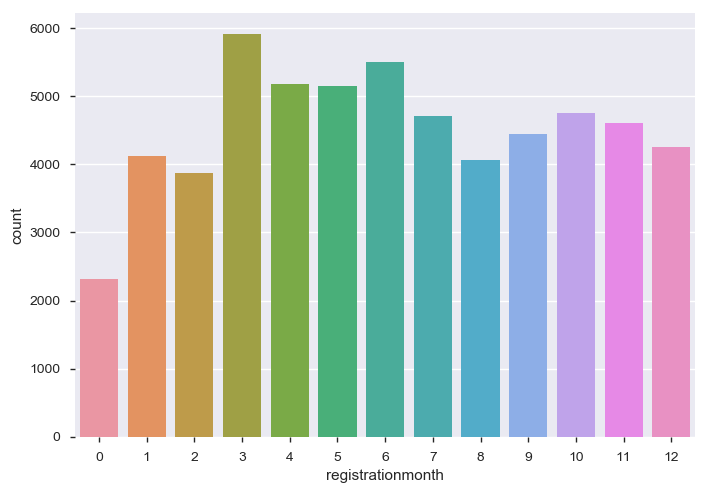

In [35]:
sns.countplot(x='registrationmonth',data=df_train)

##### There is no 'zero' month. So we are making zero month as null and replacing them with mode

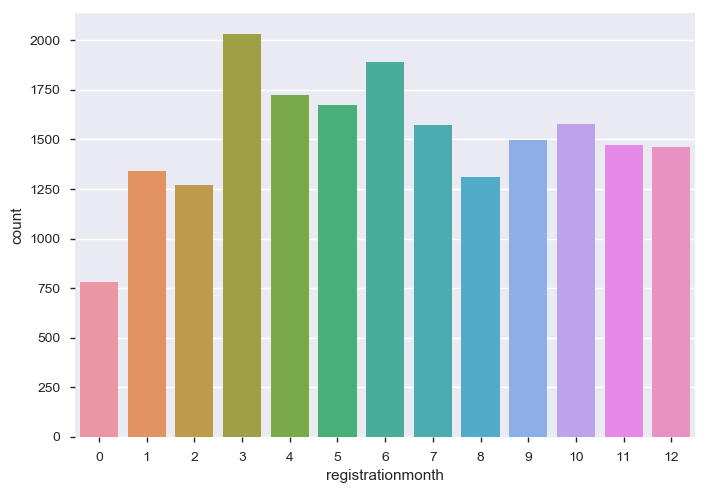

In [36]:
sns.countplot(df_test['registrationmonth'])

In [37]:
df_train.loc[df_train['registrationmonth']==0,['registrationmonth']] = np.nan

In [38]:
df_test.loc[df_test['registrationmonth']==0,['registrationmonth']] = np.nan

In [39]:
df_train.isna().sum().sort_values()

vehicleID               0
data_collected          0
zipcode                 0
brand                   0
ad_creation_date        0
model                   0
dist_travelled          0
registrationyr          0
price                   0
vehiclename             0
engpower                0
lastad_date             0
gearbox              1719
vehicletype          1844
fueltype             2085
registrationmonth    2316
damage_repair        6849
dtype: int64

In [40]:
def applymode(x):
    a = x.mode()[0]
    print(a)
    return x.fillna(a)

In [41]:
df_train.groupby(['brand']).registrationmonth.value_counts()

brand       registrationmonth
alfa_romeo  3.0                    43
            6.0                    34
            4.0                    33
            12.0                   32
            5.0                    31
            7.0                    31
            8.0                    28
            11.0                   26
            2.0                    24
            10.0                   23
            9.0                    22
            1.0                    20
audi        6.0                   567
            11.0                  565
            3.0                   529
            4.0                   529
            5.0                   527
            10.0                  500
            7.0                   481
            9.0                   478
            8.0                   434
            12.0                  401
            1.0                   381
            2.0                   357
bmw         6.0                   658
            3.0     

In [42]:
df_train['registrationmonth'] = df_train.groupby(['brand']).registrationmonth.transform(applymode)
df_test['registrationmonth'] = df_test.groupby(['brand']).registrationmonth.transform(applymode)

3.0
6.0
6.0
3.0
6.0
4.0
8.0
11.0
7.0
3.0
3.0
3.0
9.0
11.0
12.0
3.0
8.0
1.0
6.0
3.0
3.0
5.0
3.0
3.0
3.0
3.0
7.0
3.0
7.0
5.0
3.0
3.0
5.0
10.0
5.0
3.0
3.0
4.0
3.0
3.0
6.0
7.0
5.0
4.0
4.0
12.0
8.0
3.0
3.0
6.0
7.0
8.0
3.0
3.0
12.0
3.0
11.0
3.0
3.0
6.0
5.0
3.0
6.0
3.0
3.0
6.0
5.0
3.0
6.0
7.0
1.0
4.0
6.0
3.0
10.0


In [43]:
df_train.isna().sum().sort_values()

vehicleID               0
data_collected          0
zipcode                 0
brand                   0
registrationmonth       0
ad_creation_date        0
model                   0
dist_travelled          0
registrationyr          0
price                   0
vehiclename             0
engpower                0
lastad_date             0
gearbox              1719
vehicletype          1844
fueltype             2085
damage_repair        6849
dtype: int64

In [44]:
df_train.head()

vehicleID                                        vehiclename  price  \
1         1                               Subaru_G3X_Justy_1.3   3850   
2         2  Volkswagen_Passat_Variant_2.0_TDI_DPF_Comfortline   5999   
3         3  Mercedes_Benz_C_220_CDI_Automatik_Elegance_AHK...   5990   
4         4                   Alfa_Romeo_147_1.9_JTD_16V_M_Jet   4000   
5         5                                            Audi_A4  12950   

  vehicletype  registrationyr    gearbox  engpower     model  dist_travelled  \
1   Small Car            2004     manual        94     Other         50000.0   
2       Combi            2007     manual       140    passat        150000.0   
3   limousine            2007  automatic       150  c_klasse        150000.0   
4   limousine            2005     manual       150       147        150000.0   
5       Combi            2005     manual       200        a4        125000.0   

   registrationmonth fueltype          brand damage_repair  zipcode  \
1                7.0   petrol         subaru            No    34474   
2                5.0   diesel     volkswagen            No    50765   
3                2.0   diesel  mercedes_benz            No    90475   
4                9.0   diesel     alfa_romeo            No    40699   
5                3.0   petrol           audi            No    84347   

       data_collected ad_creation_date         lastad_date  
1 2016-04-03 11:54:00       2016-04-03 2016-04-07 13:15:00  
2 2016-03-08 19:54:00       2016-03-08 2016-03-11 17:15:00  
3 2016-03-26 17:38:00       2016-03-26 2016-03-26 17:38:00  
4 2016-03-11 13:42:00       2016-03-11 2016-03-12 02:45:00  
5 2016-03-17 17:49:00       2016-03-17 2016-04-07 04:17:00

In [45]:
#To find the no.of yrs vehicle used, we are extracting details from reg.month and reg.yr

In [46]:
df_train['registrationmonth'] = df_train['registrationmonth'].astype(int)

In [47]:
df_train['reg_month_year'] = df_train['registrationyr'].map(str) +'/'+ df_train['registrationmonth'].map(str)

In [48]:
df_train['reg_month_year'] = pd.to_datetime(df_train['reg_month_year'],format='%Y/%m')

In [49]:
df_train.head()

vehicleID                                        vehiclename  price  \
1         1                               Subaru_G3X_Justy_1.3   3850   
2         2  Volkswagen_Passat_Variant_2.0_TDI_DPF_Comfortline   5999   
3         3  Mercedes_Benz_C_220_CDI_Automatik_Elegance_AHK...   5990   
4         4                   Alfa_Romeo_147_1.9_JTD_16V_M_Jet   4000   
5         5                                            Audi_A4  12950   

  vehicletype  registrationyr    gearbox  engpower     model  dist_travelled  \
1   Small Car            2004     manual        94     Other         50000.0   
2       Combi            2007     manual       140    passat        150000.0   
3   limousine            2007  automatic       150  c_klasse        150000.0   
4   limousine            2005     manual       150       147        150000.0   
5       Combi            2005     manual       200        a4        125000.0   

   registrationmonth fueltype          brand damage_repair  zipcode  \
1                  7   petrol         subaru            No    34474   
2                  5   diesel     volkswagen            No    50765   
3                  2   diesel  mercedes_benz            No    90475   
4                  9   diesel     alfa_romeo            No    40699   
5                  3   petrol           audi            No    84347   

       data_collected ad_creation_date         lastad_date reg_month_year  
1 2016-04-03 11:54:00       2016-04-03 2016-04-07 13:15:00     2004-07-01  
2 2016-03-08 19:54:00       2016-03-08 2016-03-11 17:15:00     2007-05-01  
3 2016-03-26 17:38:00       2016-03-26 2016-03-26 17:38:00     2007-02-01  
4 2016-03-11 13:42:00       2016-03-11 2016-03-12 02:45:00     2005-09-01  
5 2016-03-17 17:49:00       2016-03-17 2016-04-07 04:17:00     2005-03-01

In [50]:
#Applying the same strategy for test data

In [51]:
df_test['registrationmonth'] = df_test['registrationmonth'].astype(int)

In [52]:
df_test['reg_month_year'] = df_test['registrationyr'].map(str) +'/'+ df_test['registrationmonth'].map(str)

In [53]:
df_test['reg_month_year'] = pd.to_datetime(df_test['reg_month_year'],format='%Y/%m')

In [54]:
df_test.head()

vehicleID                                        vehiclename vehicletype  \
1     60001                     Jeep_Grand_Cherokee_"Overland"         suv   
2     60002                     VW_PASSAT_1.9_TDI_131_PS_LEDER       Combi   
3     60003  Nissan_Navara_2.5DPF_SE4x4_Klima_Sitzheizg_Blu...         suv   
4     60004                   Ford_C_MAX_2.0_TDCi_DPF_Titanium         bus   
5     60005              BMW_530d_touring_Vollausstattung_NAVI       Combi   

   registrationyr    gearbox  engpower   model  dist_travelled  \
1            2004  automatic       163   grand        125000.0   
2            2004     manual       131  passat        150000.0   
3            2011     manual       190  navara         70000.0   
4            2007     manual       136   c_max        150000.0   
5            2002  automatic       193     5er        150000.0   

   registrationmonth fueltype       brand damage_repair  zipcode  \
1                  8   diesel        jeep           NaN    90480   
2                  2      NaN  volkswagen            No    90762   
3                  3   diesel      nissan            No     4177   
4                  6   diesel        ford            No    88361   
5                  9   diesel         bmw           Yes    73765   

       data_collected ad_creation_date         lastad_date reg_month_year  
1 2016-03-14 12:52:00       2016-03-14 2016-04-05 12:47:00     2004-08-01  
2 2016-03-21 21:37:00       2016-03-21 2016-03-23 02:50:00     2004-02-01  
3 2016-03-21 12:57:00       2016-03-21 2016-04-06 07:45:00     2011-03-01  
4 2016-03-23 15:48:00       2016-03-23 2016-04-05 18:45:00     2007-06-01  
5 2016-03-18 21:44:00       2016-03-18 2016-03-18 21:44:00     2002-09-01

In [55]:
df_train.isna().sum().sort_values()

vehicleID               0
ad_creation_date        0
data_collected          0
zipcode                 0
brand                   0
registrationmonth       0
lastad_date             0
dist_travelled          0
engpower                0
registrationyr          0
price                   0
vehiclename             0
model                   0
reg_month_year          0
gearbox              1719
vehicletype          1844
fueltype             2085
damage_repair        6849
dtype: int64

In [56]:
from datetime import timedelta

In [57]:
df_train['vehicle_yrs'] = round((df_train['data_collected'] - df_train['reg_month_year'])/timedelta(days=365))
df_test['vehicle_yrs'] = round((df_test['data_collected'] - df_test['reg_month_year'])/timedelta(days=365))

In [58]:
df_train.head()

vehicleID                                        vehiclename  price  \
1         1                               Subaru_G3X_Justy_1.3   3850   
2         2  Volkswagen_Passat_Variant_2.0_TDI_DPF_Comfortline   5999   
3         3  Mercedes_Benz_C_220_CDI_Automatik_Elegance_AHK...   5990   
4         4                   Alfa_Romeo_147_1.9_JTD_16V_M_Jet   4000   
5         5                                            Audi_A4  12950   

  vehicletype  registrationyr    gearbox  engpower     model  dist_travelled  \
1   Small Car            2004     manual        94     Other         50000.0   
2       Combi            2007     manual       140    passat        150000.0   
3   limousine            2007  automatic       150  c_klasse        150000.0   
4   limousine            2005     manual       150       147        150000.0   
5       Combi            2005     manual       200        a4        125000.0   

   registrationmonth fueltype          brand damage_repair  zipcode  \
1                  7   petrol         subaru            No    34474   
2                  5   diesel     volkswagen            No    50765   
3                  2   diesel  mercedes_benz            No    90475   
4                  9   diesel     alfa_romeo            No    40699   
5                  3   petrol           audi            No    84347   

       data_collected ad_creation_date         lastad_date reg_month_year  \
1 2016-04-03 11:54:00       2016-04-03 2016-04-07 13:15:00     2004-07-01   
2 2016-03-08 19:54:00       2016-03-08 2016-03-11 17:15:00     2007-05-01   
3 2016-03-26 17:38:00       2016-03-26 2016-03-26 17:38:00     2007-02-01   
4 2016-03-11 13:42:00       2016-03-11 2016-03-12 02:45:00     2005-09-01   
5 2016-03-17 17:49:00       2016-03-17 2016-04-07 04:17:00     2005-03-01   

   vehicle_yrs  
1         12.0  
2          9.0  
3          9.0  
4         11.0  
5         11.0

In [59]:
df_train['ad_display_period'] = round((df_train['lastad_date'] - df_train['ad_creation_date'])/timedelta(hours=24))
df_test['ad_display_period'] = round((df_test['lastad_date'] - df_test['ad_creation_date'])/timedelta(hours=24))

In [60]:
df_train.head()

vehicleID                                        vehiclename  price  \
1         1                               Subaru_G3X_Justy_1.3   3850   
2         2  Volkswagen_Passat_Variant_2.0_TDI_DPF_Comfortline   5999   
3         3  Mercedes_Benz_C_220_CDI_Automatik_Elegance_AHK...   5990   
4         4                   Alfa_Romeo_147_1.9_JTD_16V_M_Jet   4000   
5         5                                            Audi_A4  12950   

  vehicletype  registrationyr    gearbox  engpower     model  dist_travelled  \
1   Small Car            2004     manual        94     Other         50000.0   
2       Combi            2007     manual       140    passat        150000.0   
3   limousine            2007  automatic       150  c_klasse        150000.0   
4   limousine            2005     manual       150       147        150000.0   
5       Combi            2005     manual       200        a4        125000.0   

   registrationmonth fueltype          brand damage_repair  zipcode  \
1                  7   petrol         subaru            No    34474   
2                  5   diesel     volkswagen            No    50765   
3                  2   diesel  mercedes_benz            No    90475   
4                  9   diesel     alfa_romeo            No    40699   
5                  3   petrol           audi            No    84347   

       data_collected ad_creation_date         lastad_date reg_month_year  \
1 2016-04-03 11:54:00       2016-04-03 2016-04-07 13:15:00     2004-07-01   
2 2016-03-08 19:54:00       2016-03-08 2016-03-11 17:15:00     2007-05-01   
3 2016-03-26 17:38:00       2016-03-26 2016-03-26 17:38:00     2007-02-01   
4 2016-03-11 13:42:00       2016-03-11 2016-03-12 02:45:00     2005-09-01   
5 2016-03-17 17:49:00       2016-03-17 2016-04-07 04:17:00     2005-03-01   

   vehicle_yrs  ad_display_period  
1         12.0                5.0  
2          9.0                4.0  
3          9.0                1.0  
4         11.0                1.0  
5         11.0               21.0

In [61]:
bins = [0,35,70,200,400,500,1000,1500,2000,5000,10000,20000]
pd.cut(df_train['engpower'],bins).value_counts()

(70, 200]         43125
(200, 400]         6229
(35, 70]           5869
(400, 500]          157
(500, 1000]          56
(0, 35]              32
(1000, 1500]         15
(10000, 20000]        7
(1500, 2000]          5
(5000, 10000]         3
(2000, 5000]          3
Name: engpower, dtype: int64

In [62]:
#Lowest BHP car - OMNI 34, highest 1479 BHP. by considering this we are making below 34 and above 1500 as null

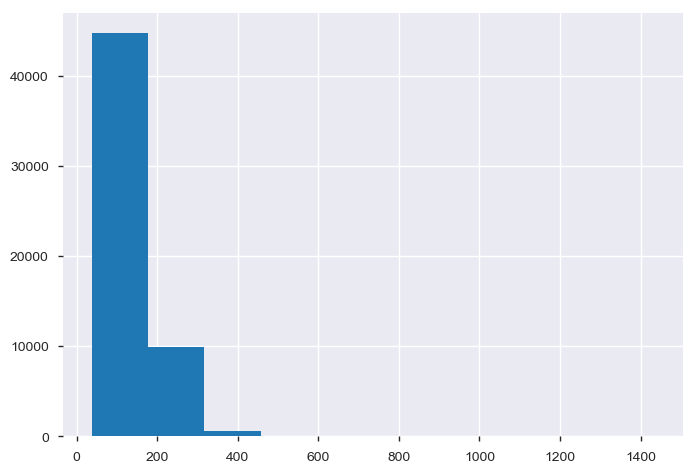

In [63]:
df_train[(df_train['engpower'] > 35) & (df_train['engpower'] < 1500)]['engpower'].hist()

#### Replacing nan by median values in train & test data for eng power less than 35BHP and more than 1500BHP

In [64]:
df_train.loc[(df_train['engpower'] < 35) | (df_train['engpower'] > 1500),'engpower'] = np.nan
df_test.loc[(df_train['engpower'] < 35) | (df_test['engpower'] > 1500),'engpower'] = np.nan

In [65]:
df_train['engpower'].fillna(df_train['engpower'].median(),inplace = True)
df_test['engpower'].fillna(df_test['engpower'].median(),inplace = True)

In [66]:
df_train.isna().sum().sort_values()

vehicleID               0
reg_month_year          0
lastad_date             0
ad_creation_date        0
data_collected          0
zipcode                 0
brand                   0
vehicle_yrs             0
registrationmonth       0
model                   0
engpower                0
registrationyr          0
price                   0
vehiclename             0
dist_travelled          0
ad_display_period       0
gearbox              1719
vehicletype          1844
fueltype             2085
damage_repair        6849
dtype: int64

In [67]:
df_train.groupby('damage_repair').vehicle_yrs.apply(lambda x:x.mode()[0])

damage_repair
No     10.0
Yes    11.0
Name: vehicle_yrs, dtype: float64

In [68]:
df_train['vehicletype'].value_counts()

limousine    15670
Combi        12849
Small Car    11935
bus           6336
cabrio        3961
suv           3151
coupe         2748
Other          363
Name: vehicletype, dtype: int64

In [69]:
df_train['gearbox'].value_counts()

manual       42481
automatic    14657
Name: gearbox, dtype: int64

In [70]:
df_train['fueltype'].value_counts()

petrol     31040
diesel     24739
lpg          781
cng          124
hybrid        59
electro       19
other         10
Name: fueltype, dtype: int64

In [71]:
df_train['gearbox'].fillna(df_train['gearbox'].transform(applymode),inplace = True)

manual


In [72]:
df_train['fueltype'].fillna(df_train['fueltype'].transform(applymode),inplace = True)
df_test['gearbox'].fillna(df_test['gearbox'].transform(applymode),inplace = True)
df_test['fueltype'].fillna(df_test['fueltype'].transform(applymode),inplace = True)

petrol
manual
petrol


In [73]:
df_train['vehicletype'].fillna(df_train['vehicletype'].transform(applymode),inplace = True)
df_test['vehicletype'].fillna(df_test['vehicletype'].transform(applymode),inplace = True)

limousine
limousine


In [74]:
df_train['damage_repair'] = df_train.groupby('vehicletype').damage_repair.transform(applymode)
df_test['damage_repair'] = df_test.groupby('vehicletype').damage_repair.transform(applymode)

No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No


In [75]:
df_train['damage_repair'].value_counts()

No     55538
Yes     3319
Name: damage_repair, dtype: int64

In [76]:
df_train.head()

vehicleID                                        vehiclename  price  \
1         1                               Subaru_G3X_Justy_1.3   3850   
2         2  Volkswagen_Passat_Variant_2.0_TDI_DPF_Comfortline   5999   
3         3  Mercedes_Benz_C_220_CDI_Automatik_Elegance_AHK...   5990   
4         4                   Alfa_Romeo_147_1.9_JTD_16V_M_Jet   4000   
5         5                                            Audi_A4  12950   

  vehicletype  registrationyr    gearbox  engpower     model  dist_travelled  \
1   Small Car            2004     manual      94.0     Other         50000.0   
2       Combi            2007     manual     140.0    passat        150000.0   
3   limousine            2007  automatic     150.0  c_klasse        150000.0   
4   limousine            2005     manual     150.0       147        150000.0   
5       Combi            2005     manual     200.0        a4        125000.0   

   registrationmonth fueltype          brand damage_repair  zipcode  \
1                  7   petrol         subaru            No    34474   
2                  5   diesel     volkswagen            No    50765   
3                  2   diesel  mercedes_benz            No    90475   
4                  9   diesel     alfa_romeo            No    40699   
5                  3   petrol           audi            No    84347   

       data_collected ad_creation_date         lastad_date reg_month_year  \
1 2016-04-03 11:54:00       2016-04-03 2016-04-07 13:15:00     2004-07-01   
2 2016-03-08 19:54:00       2016-03-08 2016-03-11 17:15:00     2007-05-01   
3 2016-03-26 17:38:00       2016-03-26 2016-03-26 17:38:00     2007-02-01   
4 2016-03-11 13:42:00       2016-03-11 2016-03-12 02:45:00     2005-09-01   
5 2016-03-17 17:49:00       2016-03-17 2016-04-07 04:17:00     2005-03-01   

   vehicle_yrs  ad_display_period  
1         12.0                5.0  
2          9.0                4.0  
3          9.0                1.0  
4         11.0                1.0  
5         11.0               21.0

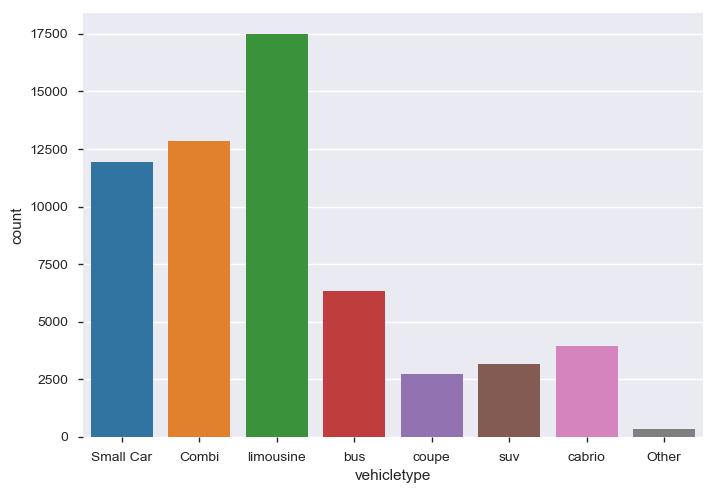

In [77]:
sns.countplot(x='vehicletype',data=df_train)

#### Drop irrelevant columns on both train and test data

In [78]:
df_train.keys()

Index(['vehicleID', 'vehiclename', 'price', 'vehicletype', 'registrationyr',
       'gearbox', 'engpower', 'model', 'dist_travelled', 'registrationmonth',
       'fueltype', 'brand', 'damage_repair', 'zipcode', 'data_collected',
       'ad_creation_date', 'lastad_date', 'reg_month_year', 'vehicle_yrs',
       'ad_display_period'],
      dtype='object')

In [79]:
df_train.drop(['registrationyr','registrationmonth','zipcode','data_collected',
       'ad_creation_date', 'lastad_date', 'reg_month_year','ad_display_period'],axis=1,inplace=True)
df_test.drop(['registrationyr','registrationmonth','zipcode','data_collected',
       'ad_creation_date', 'lastad_date', 'reg_month_year','ad_display_period'],axis=1,inplace=True)
df_train.drop(['vehiclename'],axis=1,inplace=True)
df_test.drop(['vehiclename'],axis=1,inplace=True)

In [80]:
df_train.drop(['model'],axis=1,inplace=True)
df_test.drop(['model'],axis=1,inplace=True)

In [81]:
df_train.head()

vehicleID  price vehicletype    gearbox  engpower  dist_travelled fueltype  \
1         1   3850   Small Car     manual      94.0         50000.0   petrol   
2         2   5999       Combi     manual     140.0        150000.0   diesel   
3         3   5990   limousine  automatic     150.0        150000.0   diesel   
4         4   4000   limousine     manual     150.0        150000.0   diesel   
5         5  12950       Combi     manual     200.0        125000.0   petrol   

           brand damage_repair  vehicle_yrs  
1         subaru            No         12.0  
2     volkswagen            No          9.0  
3  mercedes_benz            No          9.0  
4     alfa_romeo            No         11.0  
5           audi            No         11.0

In [82]:
df_train['source'] = 'train'
df_test['source'] = 'test'

In [83]:
df = pd.concat([df_train,df_test],sort=False)

In [84]:
df['vehicleID'] = df['vehicleID'].astype(int)

In [85]:
df_cat = df.select_dtypes(exclude=[np.number]).columns

In [86]:
df_int = df.columns.difference(df_cat)

In [87]:
df_int

Index(['dist_travelled', 'engpower', 'price', 'vehicleID', 'vehicle_yrs'], dtype='object')

In [88]:
df['brand'].unique()

array(['subaru', 'volkswagen', 'mercedes_benz', 'alfa_romeo', 'audi',
       'mazda', 'bmw', 'land_rover', 'opel', 'smart', 'renault', 'fiat',
       'toyota', 'ford', 'porsche', 'nissan', 'mini', 'peugeot',
       'hyundai', 'chrysler', 'chevrolet', 'mitsubishi', 'seat', 'suzuki',
       'kia', 'citroen', 'honda', 'jaguar', 'dacia', 'skoda', 'daihatsu',
       'volvo', 'jeep', 'rover', 'saab', 'daewoo', 'lada', 'lancia'],
      dtype=object)

In [89]:
df[df_cat].nunique()

vehicletype       8
gearbox           2
fueltype          7
brand            38
damage_repair     2
source            2
dtype: int64

In [90]:
df_onehot = pd.get_dummies(df[df_cat])

In [91]:
df_onehot.head()

vehicletype_Combi  vehicletype_Other  vehicletype_Small Car  \
1                  0                  0                      1   
2                  1                  0                      0   
3                  0                  0                      0   
4                  0                  0                      0   
5                  1                  0                      0   

   vehicletype_bus  vehicletype_cabrio  vehicletype_coupe  \
1                0                   0                  0   
2                0                   0                  0   
3                0                   0                  0   
4                0                   0                  0   
5                0                   0                  0   

   vehicletype_limousine  vehicletype_suv  gearbox_automatic  gearbox_manual  \
1                      0                0                  0               1   
2                      0                0                  0               1   
3                      1                0                  1               0   
4                      1                0                  0               1   
5                      0                0                  0               1   

       ...       brand_smart  brand_subaru  brand_suzuki  brand_toyota  \
1      ...                 0             1             0             0   
2      ...                 0             0             0             0   
3      ...                 0             0             0             0   
4      ...                 0             0             0             0   
5      ...                 0             0             0             0   

   brand_volkswagen  brand_volvo  damage_repair_No  damage_repair_Yes  \
1                 0            0                 1                  0   
2                 1            0                 1                  0   
3                 0            0                 1                  0   
4                 0            0                 1                  0   
5                 0            0                 1                  0   

   source_test  source_train  
1            0             1  
2            0             1  
3            0             1  
4            0             1  
5            0             1  

[5 rows x 59 columns]

In [92]:
data_model = pd.concat([df[df_int],df_onehot],axis=1)

In [93]:
data_model.head()

dist_travelled  engpower    price  vehicleID  vehicle_yrs  \
1         50000.0      94.0   3850.0          1         12.0   
2        150000.0     140.0   5999.0          2          9.0   
3        150000.0     150.0   5990.0          3          9.0   
4        150000.0     150.0   4000.0          4         11.0   
5        125000.0     200.0  12950.0          5         11.0   

   vehicletype_Combi  vehicletype_Other  vehicletype_Small Car  \
1                  0                  0                      1   
2                  1                  0                      0   
3                  0                  0                      0   
4                  0                  0                      0   
5                  1                  0                      0   

   vehicletype_bus  vehicletype_cabrio      ...       brand_smart  \
1                0                   0      ...                 0   
2                0                   0      ...                 0   
3                0                   0      ...                 0   
4                0                   0      ...                 0   
5                0                   0      ...                 0   

   brand_subaru  brand_suzuki  brand_toyota  brand_volkswagen  brand_volvo  \
1             1             0             0                 0            0   
2             0             0             0                 1            0   
3             0             0             0                 0            0   
4             0             0             0                 0            0   
5             0             0             0                 0            0   

   damage_repair_No  damage_repair_Yes  source_test  source_train  
1                 1                  0            0             1  
2                 1                  0            0             1  
3                 1                  0            0             1  
4                 1                  0            0             1  
5                 1                  0            0             1  

[5 rows x 64 columns]

#### Separating train and test columns

In [94]:
train_mod = data_model.loc[data_model.source_train == 1.0,:]
test_mod = data_model.loc[data_model.source_train == 0.0,:]

In [95]:
train_mod = train_mod.drop(['source_test','source_train'],axis=1)
test_mod = test_mod.drop(['source_test','source_train','price'],axis=1)

In [96]:
test_mod.columns

Index(['dist_travelled', 'engpower', 'vehicleID', 'vehicle_yrs',
       'vehicletype_Combi', 'vehicletype_Other', 'vehicletype_Small Car',
       'vehicletype_bus', 'vehicletype_cabrio', 'vehicletype_coupe',
       'vehicletype_limousine', 'vehicletype_suv', 'gearbox_automatic',
       'gearbox_manual', 'fueltype_cng', 'fueltype_diesel', 'fueltype_electro',
       'fueltype_hybrid', 'fueltype_lpg', 'fueltype_other', 'fueltype_petrol',
       'brand_alfa_romeo', 'brand_audi', 'brand_bmw', 'brand_chevrolet',
       'brand_chrysler', 'brand_citroen', 'brand_dacia', 'brand_daewoo',
       'brand_daihatsu', 'brand_fiat', 'brand_ford', 'brand_honda',
       'brand_hyundai', 'brand_jaguar', 'brand_jeep', 'brand_kia',
       'brand_lada', 'brand_lancia', 'brand_land_rover', 'brand_mazda',
       'brand_mercedes_benz', 'brand_mini', 'brand_mitsubishi', 'brand_nissan',
       'brand_opel', 'brand_peugeot', 'brand_porsche', 'brand_renault',
       'brand_rover', 'brand_saab', 'brand_seat', 'brand

In [97]:
train_mod.to_csv('final_train_mod.csv',index=False)
test_mod.to_csv('final_test_mod.csv',index=False)

#### Model Preparation

In [98]:
X = train_mod.drop(['vehicleID','price'],axis=1)
y = train_mod['price']

print(X.shape)
print(y.shape)

(58857, 60)
(58857,)


In [99]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor as XGBR
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

In [101]:
regressor = [LinearRegression(),
             Lasso(),
            KNeighborsRegressor(),
            DecisionTreeRegressor(),
            AdaBoostRegressor(),
            GradientBoostingRegressor(),
            RandomForestRegressor(),
            XGBR(),
            GaussianNB()]

In [102]:
regressor_columns = []
regressor_compare = pd.DataFrame(columns=regressor_columns)

In [103]:
row_index = 0
for model in regressor:
    
    predict_train = model.fit(X_train,y_train).predict(X_train)
    predict_test = model.fit(X_train,y_train).predict(X_test)
    
    Alg_name = model.__class__.__name__
    regressor_compare.loc[row_index,'Alg Name'] = Alg_name
    regressor_compare.loc[row_index,'Alg Train Error'] = np.mean(np.abs((y_train - predict_train)/y_train)) * 100
    regressor_compare.loc[row_index,'Alg Test Error'] = np.mean(np.abs((y_test - predict_test)/y_test)) * 100
    
    row_index += 1
    
regressor_compare.sort_values(by=['Alg Test Error'],ascending=False,inplace=True)
regressor_compare

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Alg Name  Alg Train Error  Alg Test Error
4          AdaBoostRegressor        99.789203       97.804184
0           LinearRegression        55.334806       57.203982
1                      Lasso        55.214472       57.092969
8                 GaussianNB        54.263933       56.346123
2        KNeighborsRegressor        24.184942       30.242062
5  GradientBoostingRegressor        28.940235       29.585446
7               XGBRegressor        29.028590       29.506740
3      DecisionTreeRegressor         9.081064       28.535171
6      RandomForestRegressor        14.503121       26.190507

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

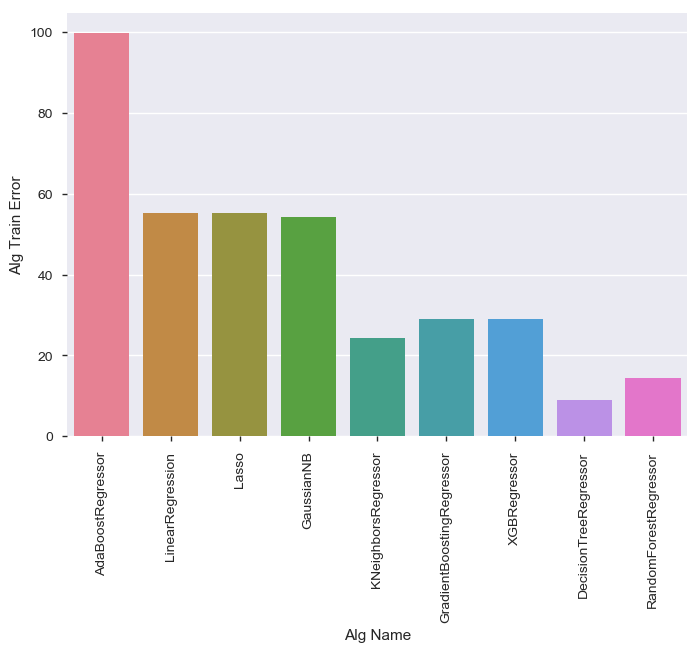

In [107]:
sns.barplot(x='Alg Name',y='Alg Train Error',data=regressor_compare,palette='husl')
plt.xticks(rotation = 90)
plt.title('Training Error')

Text(0.5, 1.0, 'Test Error')

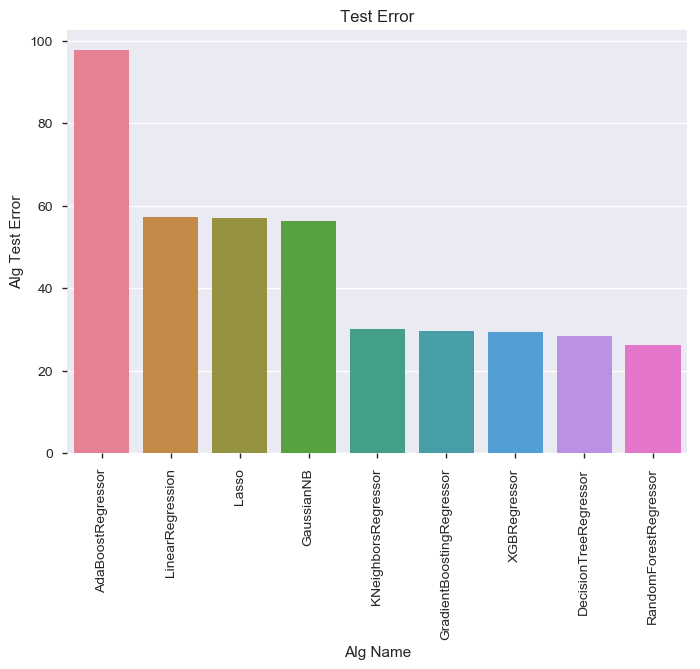

In [108]:
sns.barplot(x='Alg Name',y='Alg Test Error',data=regressor_compare,palette='husl')
plt.xticks(rotation = 90)
plt.title('Test Error')

In [115]:
param_grid = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

In [116]:
rf = RandomForestRegressor()

In [117]:
grid = GridSearchCV(estimator=rf,param_grid=param_grid,cv=3)

In [118]:
grid.fit(X_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 20, 30], 'max_features': ['auto', 'sqrt', 'log2'], 'min_samples_split': [2, 4, 8], 'bootstrap': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [126]:
grid.best_params_

{'bootstrap': False,
 'max_features': 'sqrt',
 'min_samples_split': 8,
 'n_estimators': 30}

In [119]:
pred_y = grid.predict(X_test)

In [120]:
MAPE = np.mean(np.abs((y_test - pred_y) / y_test)) * 100
print('Mean Absolute Percentage Error for Random Forest:',MAPE)

Mean Absolute Percentage Error for Random Forest: 25.693043205765527


#### Predicting values of test data which we separated earlier

In [125]:
vehicleID = test_mod[['vehicleID']]
test_mod_pred = test_mod.drop(['vehicleID'],axis=1)

In [130]:
RF = RandomForestRegressor(bootstrap=False,max_features='sqrt',min_samples_split=8,n_estimators=30)

In [131]:
RF.fit(X_train,y_train)

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=8,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [132]:
test_mod_pred['predictions'] = RF.predict(test_mod_pred)

In [133]:
pred_results = pd.concat([vehicleID,test_mod_pred],axis=1)

In [134]:
result = pred_results.to_csv('Car_price_prediction.csv')

In [136]:
result = pd.read_csv('Car_price_prediction.csv')
result.head()

Unnamed: 0  vehicleID  dist_travelled  engpower  vehicle_yrs  \
0           1      60001        125000.0     163.0         12.0   
1           2      60002        150000.0     131.0         12.0   
2           3      60003         70000.0     190.0          5.0   
3           4      60004        150000.0     136.0          9.0   
4           5      60005        150000.0     193.0         14.0   

   vehicletype_Combi  vehicletype_Other  vehicletype_Small Car  \
0                  0                  0                      0   
1                  1                  0                      0   
2                  0                  0                      0   
3                  0                  0                      0   
4                  1                  0                      0   

   vehicletype_bus  vehicletype_cabrio      ...       brand_skoda  \
0                0                   0      ...                 0   
1                0                   0      ...                 0   
2                0                   0      ...                 0   
3                1                   0      ...                 0   
4                0                   0      ...                 0   

   brand_smart  brand_subaru  brand_suzuki  brand_toyota  brand_volkswagen  \
0            0             0             0             0                 0   
1            0             0             0             0                 1   
2            0             0             0             0                 0   
3            0             0             0             0                 0   
4            0             0             0             0                 0   

   brand_volvo  damage_repair_No  damage_repair_Yes   predictions  
0            0                 1                  0   8782.850000  
1            0                 1                  0   4649.775159  
2            0                 1                  0  17899.944603  
3            0                 1                  0   5169.427778  
4            0                 0                  1   3380.954683  

[5 rows x 63 columns]

In [137]:
final = result.loc[:,['vehicleID','predictions']]

In [138]:
final.head()

vehicleID   predictions
0      60001   8782.850000
1      60002   4649.775159
2      60003  17899.944603
3      60004   5169.427778
4      60005   3380.954683